In [1]:
import cv2
import numpy as np
import onnxruntime as ort
import matplotlib.pyplot as plt

In [ ]:
# Imagenet means/std you used
IMNET_MEAN = np.array([0.485, 0.456, 0.406], dtype=np.float32)
IMNET_STD  = np.array([0.229, 0.224, 0.225], dtype=np.float32)

def preprocess(img_path: str, apply_clahe=True) -> np.ndarray:
    img = cv2.imread(img_path)  # BGR uint8
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Visualization (optional)
    plt.imshow(img)
    plt.show()

    img = cv2.resize(img, (128, 256))          # (W,H)
    img = img.astype(np.float32) / 255.0
    img = (img - IMNET_MEAN) / IMNET_STD
    img = np.transpose(img, (2, 0, 1))         # CHW

    return np.expand_dims(img, 0)              # [1, 3, 256, 128]

sess = ort.InferenceSession("employee_classifier.onnx",providers=["CPUExecutionProvider"])   # or CUDAExecutionProvider

def predict(img_path:str) -> int:
    inp  = preprocess(img_path)                         # float32
    logits = sess.run(None, {"images": inp})[0]         # [1,2]
    return int(logits.argmax(1)[0])                     # 1 = employee, 0 = customer

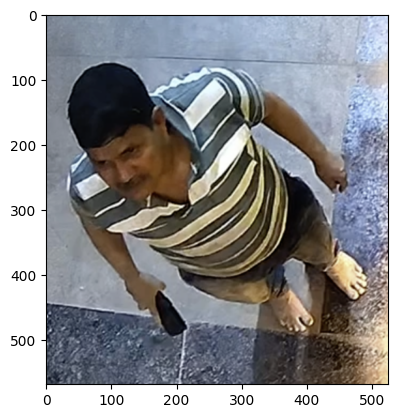

Prediction: customer


In [3]:
label = predict("/Users/saptarshimallikthakur/Desktop/Screen Recording/blue tokai/ss/Screenshot 2025-05-02 at 11.20.08 AM.png")
print("Prediction:", "employee" if label else "customer")

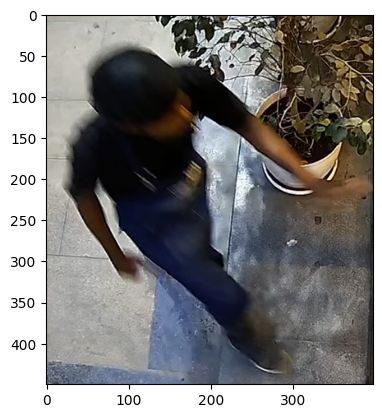

Prediction: customer


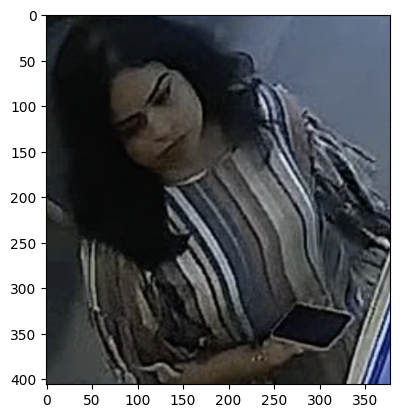

Prediction: customer


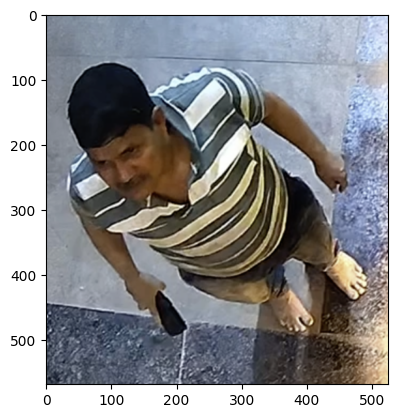

Prediction: customer


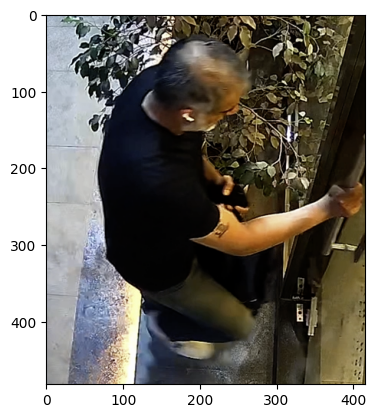

Prediction: customer


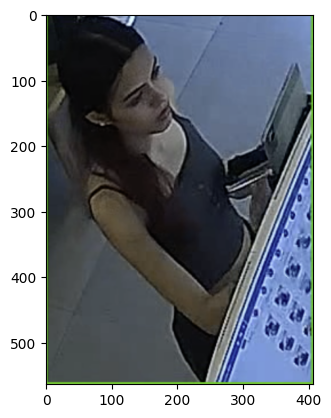

Prediction: customer


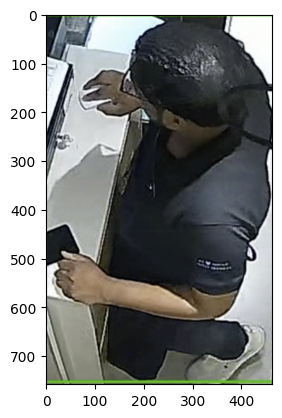

Prediction: employee


In [4]:
import os

folder_path = '/Users/saptarshimallikthakur/Desktop/Screen Recording/blue tokai/ss'  # Replace with your actual path

# Supported image extensions
image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff', '.webp')

# Loop through files in folder
for filename in os.listdir(folder_path):
    if filename.lower().endswith(image_extensions):
        full_path = os.path.join(folder_path, filename)
        label = predict(full_path)
        print("Prediction:", "employee" if label else "customer")
